<a href="https://colab.research.google.com/github/dandiputra2/TugasAkhir_DataMining/blob/main/NaiveBayess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dataset = pd.read_csv('Gaji_Dataset.csv')
X = dataset.iloc[:, [1, 2]].values
y = dataset.iloc[:, -1].values

In [3]:
dataset

,ID,Lama_Bekerja,Umur,Kelamin,Gaji
0,1,5,28,Perempuan,200000
1,2,1,21,Laki-Laki,50000
2,3,3,23,Perempuan,150000
3,4,2,22,Laki-Laki,60000
4,5,1,18,Laki-Laki,10000
5,6,25,60,Laki-Laki,5100000
6,7,19,55,Perempuan,750000
7,8,2,22,Perempuan,11000
8,9,10,36,Perempuan,61500
9,10,15,54,Perempuan,650000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            40 non-null     int64 
 1   Lama_Bekerja  40 non-null     int64 
 2   Umur          40 non-null     int64 
 3   Kelamin       40 non-null     object
 4   Gaji          40 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ KB


In [5]:
dataset.describe()

,ID,Lama_Bekerja,Umur,Gaji
count,40.000000,40.000000,40.000000,4.000000e+01
mean,20.500000,8.975000,35.550000,1.848279e+06
std,11.690452,7.265964,14.010893,3.020788e+06
min,1.000000,1.000000,18.000000,3.000000e+03
25%,10.750000,2.750000,23.000000,2.500000e+04
50%,20.500000,5.500000,30.000000,2.100500e+05
75%,30.250000,15.000000,50.750000,1.435000e+06
max,40.000000,27.000000,62.000000,1.000000e+07


In [6]:
y

array([  200000,    50000,   150000,    60000,    10000,  5100000,
         750000,    11000,    61500,   650000,   250000,  1400000,
        6000050,   220100,     7500,    87000,   930000,  7900000,
          15000,   330000,  6570000,    25000,  6845000,     6000,
           8900,    20000,     3000, 10000000,  5000000,     6100,
          80000,   900000,  1540000,  9300000,  7600000,    40000,
          25000,   730000,    50000,  1000000])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [8]:
X_train

array([[27, 62],
       [ 5, 30],
       [10, 45],
       [ 3, 23],
       [15, 50],
       [10, 34],
       [16, 49],
       [10, 34],
       [ 2, 24],
       [10, 36],
       [11, 40],
       [25, 60],
       [15, 54],
       [ 2, 23],
       [19, 53],
       [ 2, 22],
       [20, 55],
       [ 1, 21],
       [ 1, 18],
       [14, 39],
       [15, 54],
       [ 4, 23],
       [19, 55],
       [ 1, 21],
       [ 4, 26],
       [10, 36],
       [15, 54],
       [ 5, 30],
       [ 2, 22],
       [ 5, 28]])

In [9]:
y_test

array([6845000, 6570000,   20000,   10000,  250000,   87000, 5000000,
       1400000,   15000,    6100])

In [10]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
y_pred

array([ 50000, 650000,  50000,   3000,  25000,  50000,  50000,  50000,
        50000,  50000])

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


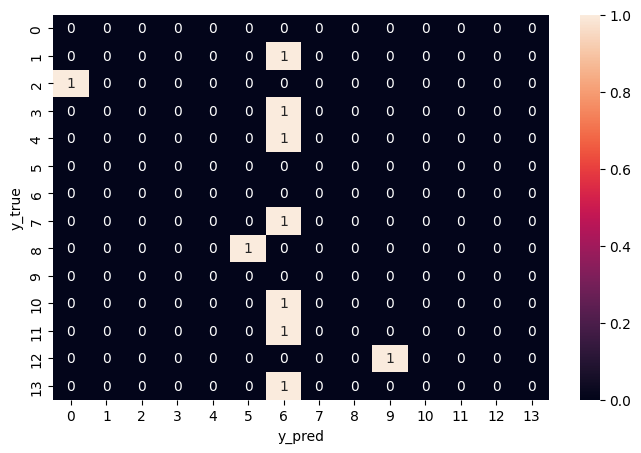

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

<ipython-input-15-5981c95df6a5>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


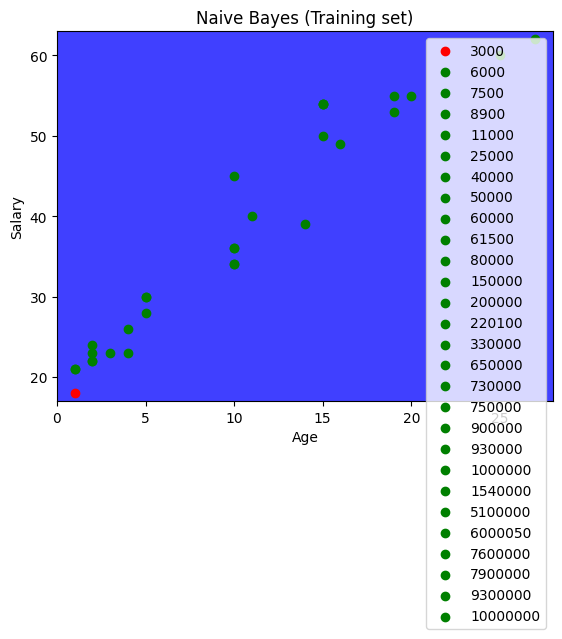

In [15]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()

<ipython-input-16-c580ff9a5a74>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


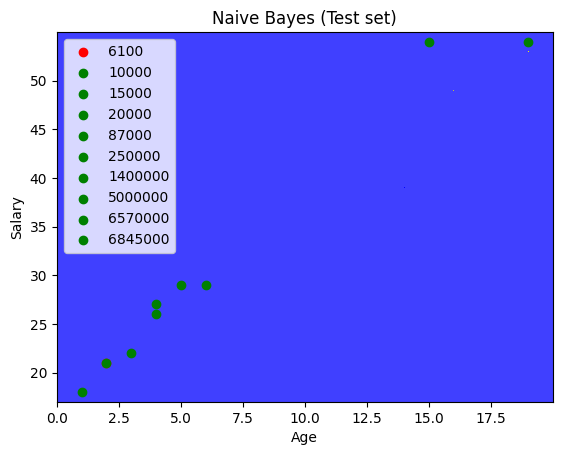

In [16]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'yellow')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.legend()
plt.show()